In [1]:
import os
import numpy as np
import pandas as pd

from unidecode import unidecode

import tensorflow as tf
from tensorflow import keras

import pickle # saving and loading trained model
from os import path

# importing required libraries for normalizing data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# importing library for plotting
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn import metrics
from sklearn.metrics import accuracy_score # for calculating accuracy of model
from sklearn.model_selection import train_test_split # for splitting the dataset for training and testing
from sklearn.metrics import classification_report # for generating a classification report of model

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

from keras.layers import Dropout, Activation, Flatten, Convolution1D, Dropout, Reshape
from keras.layers import Dense # importing dense layer
from keras.models import Sequential #importing Sequential layer

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
    print(gpu, "\n")
else:
  print("No GPU device found")

PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU') 



In [3]:
!nvidia-smi

Sat Mar 11 13:03:03 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 531.18                 Driver Version: 531.18       CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                      TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3060 Ti    WDDM | 00000000:01:00.0  On |                  N/A |
|  0%   46C    P8               13W / 200W|    807MiB /  8192MiB |      5%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [4]:
import pandas as pd
import glob

path = r'H:/Datasets/CIC-IDS2017/TrafficLabelling' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, encoding='cp1252', index_col=None, header=0)
    li.append(df)
    print("Read Completed for ", filename)

df = pd.concat(li, axis=0, ignore_index=True)

df = df.rename(columns={' Label': 'Label'})

Read Completed for  H:/Datasets/CIC-IDS2017/TrafficLabelling\Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
Read Completed for  H:/Datasets/CIC-IDS2017/TrafficLabelling\Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
Read Completed for  H:/Datasets/CIC-IDS2017/TrafficLabelling\Friday-WorkingHours-Morning.pcap_ISCX.csv
Read Completed for  H:/Datasets/CIC-IDS2017/TrafficLabelling\Monday-WorkingHours.pcap_ISCX.csv
Read Completed for  H:/Datasets/CIC-IDS2017/TrafficLabelling\Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv


C:\Users\Maruata\AppData\Local\Temp\ipykernel_33320\731995094.py:10: DtypeWarning: Columns (0,1,3,6,84) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename, encoding='cp1252', index_col=None, header=0)


Read Completed for  H:/Datasets/CIC-IDS2017/TrafficLabelling\Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
Read Completed for  H:/Datasets/CIC-IDS2017/TrafficLabelling\Tuesday-WorkingHours.pcap_ISCX.csv
Read Completed for  H:/Datasets/CIC-IDS2017/TrafficLabelling\Wednesday-workingHours.pcap_ISCX.csv


In [5]:
df.describe()

,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,...,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06
mean,4.112886e+04,8.071483e+03,9.880341e+00,1.478566e+07,9.361160e+00,1.039377e+01,5.493024e+02,1.616264e+04,2.075999e+02,1.871366e+01,...,5.418218e+00,-2.741688e+03,8.155132e+04,4.113412e+04,1.531825e+05,5.829582e+04,8.316037e+06,5.038439e+05,8.695752e+06,7.920031e+06
std,2.229494e+04,1.828363e+04,5.261922e+00,3.365374e+07,7.496728e+02,9.973883e+02,9.993589e+03,2.263088e+06,7.171848e+02,6.033935e+01,...,6.364257e+02,1.084989e+06,6.485999e+05,3.933815e+05,1.025825e+06,5.770923e+05,2.363008e+07,4.602984e+06,2.436689e+07,2.336342e+07
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.300000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,-5.368707e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.277400e+04,5.300000e+01,6.000000e+00,1.550000e+02,2.000000e+00,1.000000e+00,1.200000e+01,0.000000e+00,6.000000e+00,0.000000e+00,...,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.094400e+04,8.000000e+01,6.000000e+00,3.131600e+04,2.000000e+00,2.000000e+00,6.200000e+01,1.230000e+02,3.700000e+01,2.000000e+00,...,1.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,5.841300e+04,4.430000e+02,1.700000e+01,3.204828e+06,5.000000e+00,4.000000e+00,1.870000e+02,4.820000e+02,8.100000e+01,3.600000e+01,...,2.000000e+00,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,6.553500e+04,6.553500e+04,1.700000e+01,1.200000e+08,2.197590e+05,2.919220e+05,1.290000e+07,6.554530e+08,2.482000e+04,2.325000e+03,...,2.135570e+05,1.380000e+02,1.100000e+08,7.420000e+07,1.100000e+08,1.100000e+08,1.200000e+08,7.690000e+07,1.200000e+08,1.200000e+08


In [6]:
df.head()

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.10.5-104.16.207.165-54865-443-6,104.16.207.165,443.0,192.168.10.5,54865.0,6.0,7/7/2017 3:30,3.0,2.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,192.168.10.5-104.16.28.216-55054-80-6,104.16.28.216,80.0,192.168.10.5,55054.0,6.0,7/7/2017 3:30,109.0,1.0,1.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,192.168.10.5-104.16.28.216-55055-80-6,104.16.28.216,80.0,192.168.10.5,55055.0,6.0,7/7/2017 3:30,52.0,1.0,1.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,192.168.10.16-104.17.241.25-46236-443-6,104.17.241.25,443.0,192.168.10.16,46236.0,6.0,7/7/2017 3:30,34.0,1.0,1.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,192.168.10.5-104.19.196.102-54863-443-6,104.19.196.102,443.0,192.168.10.5,54863.0,6.0,7/7/2017 3:30,3.0,2.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


In [7]:
df["Label"].value_counts()

BENIGN                        2273097
DoS Hulk                       231073
PortScan                       158930
DDoS                           128027
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack – Brute Force         1507
Web Attack – XSS                  652
Infiltration                       36
Web Attack – Sql Injection         21
Heartbleed                         11
Name: Label, dtype: int64

In [8]:
print(df.shape)

(3119345, 85)


In [9]:
from scipy.stats import zscore

def expand_categories(values):
    result = []
    s = values.value_counts()
    t = float(len(values))
    for v in s.index:
        result.append("{}:{}%".format(v,round(100*(s[v]/t),2)))
    return "[{}]".format(",".join(result))
        
def analyze(df):
    print()
    cols = df.columns.values
    total = float(len(df))

    print("{} rows".format(int(total)))
    for col in cols:
        uniques = df[col].unique()
        unique_count = len(uniques)
        if unique_count>100:
            print("** {}:{} ({}%)".format(col,unique_count,int(((unique_count)/total)*100)))
        else:
            print("** {}:{}".format(col,expand_categories(df[col])))
            expand_categories(df[col])

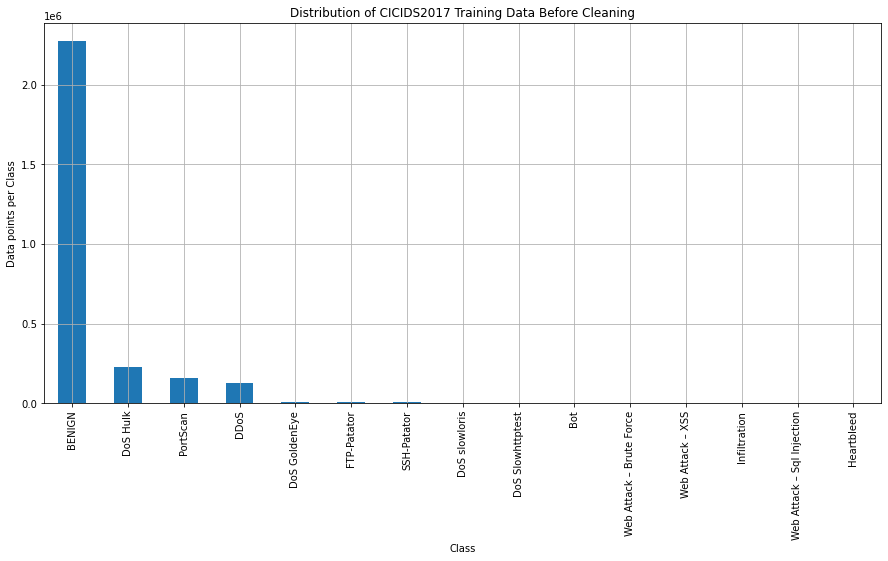

In [10]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import *

plt.figure(figsize=(15,7))
class_distribution = df['Label'].value_counts()
class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of CICIDS2017 Training Data Before Cleaning')
plt.grid()
plt.show()

In [11]:
# Before Cleaning Data set for Duplicate
sorted_ds = np.argsort(-class_distribution.values)
for i in sorted_ds:
    print('Number of data points in class', class_distribution.index[i],':', class_distribution.values[i], 
          '(', np.round((class_distribution.values[i]/df.shape[0]*100), 3), '%)')

Number of data points in class BENIGN : 2273097 ( 72.871 %)
Number of data points in class DoS Hulk : 231073 ( 7.408 %)
Number of data points in class PortScan : 158930 ( 5.095 %)
Number of data points in class DDoS : 128027 ( 4.104 %)
Number of data points in class DoS GoldenEye : 10293 ( 0.33 %)
Number of data points in class FTP-Patator : 7938 ( 0.254 %)
Number of data points in class SSH-Patator : 5897 ( 0.189 %)
Number of data points in class DoS slowloris : 5796 ( 0.186 %)
Number of data points in class DoS Slowhttptest : 5499 ( 0.176 %)
Number of data points in class Bot : 1966 ( 0.063 %)
Number of data points in class Web Attack – Brute Force : 1507 ( 0.048 %)
Number of data points in class Web Attack – XSS : 652 ( 0.021 %)
Number of data points in class Infiltration : 36 ( 0.001 %)
Number of data points in class Web Attack – Sql Injection : 21 ( 0.001 %)
Number of data points in class Heartbleed : 11 ( 0.0 %)


In [12]:
del sorted_ds

#drop na values and reset index
data_clean = df.dropna().reset_index()

# Checkng for DUPLICATE values
data_clean.drop_duplicates(keep='first', inplace = True)

data_clean['Label'].value_counts()

print("Read {} rows.".format(len(data_clean)))

Read 2829385 rows.


In [13]:
analyze(df)


3119345 rows
** Flow ID:1085072 (34%)
**  Source IP:17006 (0%)
**  Source Port:64641 (2%)
**  Destination IP:19113 (0%)
**  Destination Port:53806 (1%)
**  Protocol:[6.0:58.65%,17.0:32.04%,0.0:0.05%]
**  Timestamp:27966 (0%)
**  Flow Duration:1050900 (33%)
**  Total Fwd Packets:1433 (0%)
**  Total Backward Packets:1748 (0%)
** Total Length of Fwd Packets:17929 (0%)
**  Total Length of Bwd Packets:64699 (2%)
**  Fwd Packet Length Max:5280 (0%)
**  Fwd Packet Length Min:385 (0%)
**  Fwd Packet Length Mean:109092 (3%)
**  Fwd Packet Length Std:254385 (8%)
** Bwd Packet Length Max:4839 (0%)
**  Bwd Packet Length Min:584 (0%)
**  Bwd Packet Length Mean:154285 (4%)
**  Bwd Packet Length Std:249207 (7%)
** Flow Bytes/s:1595245 (51%)
**  Flow Packets/s:1242274 (39%)
**  Flow IAT Mean:1170378 (37%)
**  Flow IAT Std:1057047 (33%)
**  Flow IAT Max:580290 (18%)
**  Flow IAT Min:136317 (4%)
** Fwd IAT Total:493099 (15%)
**  Fwd IAT Mean:738964 (23%)
**  Fwd IAT Std:700373 (22%)
**  Fwd IAT Max:437

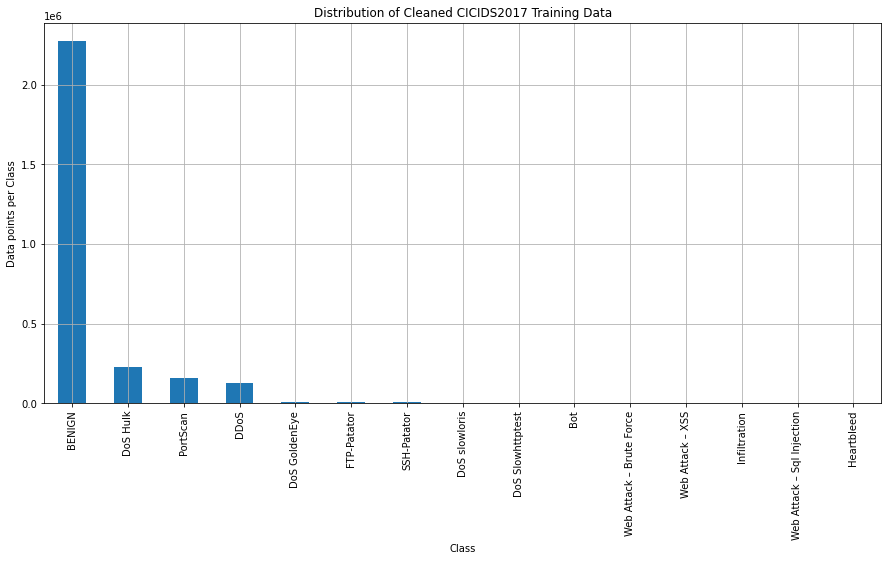

In [14]:
plt.figure(figsize=(15,7))
class_distribution = data_clean['Label'].value_counts()
class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of Cleaned CICIDS2017 Training Data')
plt.grid()
plt.show()

In [15]:
# After Cleaning Data set for Duplicate
sorted_ds = np.argsort(-class_distribution.values)
for i in sorted_ds:
    print('Number of data points in class', class_distribution.index[i],':', class_distribution.values[i], 
          '(', np.round((class_distribution.values[i]/df.shape[0]*100), 3), '%)')

Number of data points in class BENIGN : 2272688 ( 72.858 %)
Number of data points in class DoS Hulk : 230124 ( 7.377 %)
Number of data points in class PortScan : 158930 ( 5.095 %)
Number of data points in class DDoS : 128027 ( 4.104 %)
Number of data points in class DoS GoldenEye : 10293 ( 0.33 %)
Number of data points in class FTP-Patator : 7938 ( 0.254 %)
Number of data points in class SSH-Patator : 5897 ( 0.189 %)
Number of data points in class DoS slowloris : 5796 ( 0.186 %)
Number of data points in class DoS Slowhttptest : 5499 ( 0.176 %)
Number of data points in class Bot : 1966 ( 0.063 %)
Number of data points in class Web Attack – Brute Force : 1507 ( 0.048 %)
Number of data points in class Web Attack – XSS : 652 ( 0.021 %)
Number of data points in class Infiltration : 36 ( 0.001 %)
Number of data points in class Web Attack – Sql Injection : 21 ( 0.001 %)
Number of data points in class Heartbleed : 11 ( 0.0 %)


In [16]:
data_clean=data_clean.drop('Flow ID',axis=1)
data_clean=data_clean.drop(' Source IP',axis=1)
data_clean=data_clean.drop(' Destination IP',axis=1)
data_clean=data_clean.drop(' Timestamp',axis=1)
#df=df.drop(' Source Port',axis=1)
#df=df.drop(' Destination Port',axis=1)

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder



#drop na values and reset index
data_clean = data_clean.dropna().reset_index()

# label encoding
labelencoder = LabelEncoder()
data_clean['Label'] = labelencoder.fit_transform(data_clean['Label'])

data_clean['Label'].value_counts()

0     2272688
4      230124
10     158930
2      128027
3       10293
7        7938
11       5897
6        5796
5        5499
1        1966
12       1507
14        652
9          36
13         21
8          11
Name: Label, dtype: int64

In [18]:
print(data_clean.shape)

(2829385, 83)


In [19]:
data_np = data_clean.to_numpy(dtype="float32")

#drop inf values
data_np = data_np[~np.isinf(data_np).any(axis=1)]

X = data_np[:, 0:81]

enc = OneHotEncoder()

Y = enc.fit_transform(data_np[:,82:]).toarray()

In [20]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, Y, test_size=0.25, random_state=2, shuffle=True)

_features = X.shape[1]
n_classes = Y.shape[1]

print('X.shape = ',X.shape)
print('Y.shape = ',Y.shape)
print('X_train.shape = ',X_train.shape)
print('y_train.shape = ', Y_train.shape)
print('X_test.shape = ', X_test.shape)
print('y_test.shape = ',Y_test.shape)

X.shape =  (2827876, 81)
Y.shape =  (2827876, 15)
X_train.shape =  (2120907, 81)
y_train.shape =  (2120907, 15)
X_test.shape =  (706969, 81)
y_test.shape =  (706969, 15)


In [21]:
print("X Shape: ", X.shape)
print("Y Shape: ", Y.shape)

X Shape:  (2827876, 81)
Y Shape:  (2827876, 15)


# DNN

In [22]:
# In order to ignore FutureWarning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

from keras.models import Sequential
from keras import callbacks
from keras.layers import Dense, Activation, Flatten, Convolution1D, Dropout
from sklearn import metrics

import uuid
import gc
from tensorflow import keras
import tensorflow as tf

In [23]:
from tensorflow.keras.callbacks import EarlyStopping


# Simple 4 Layer Dense Model
model = Sequential()
model.add(Dense(128, input_dim=_features, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(n_classes, kernel_initializer='normal'))
model.add(Dense(n_classes))
model.add(Activation('softmax'))
model.summary() 

opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='BinaryCrossentropy', optimizer=opt, metrics=['accuracy'])

early_stop_callback = keras.callbacks.EarlyStopping(monitor='loss', patience=5)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                                  patience=3, min_lr=0.001)
    
history = model.fit(X_train, Y_train,
                              batch_size=128,
                              epochs=30,
                              verbose=True, #,callbacks=[reduce_lr, early_stop_callback],
                              validation_data=(X_test, Y_test))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               10496     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 15)                1

In [24]:
import tensorflow.keras.backend as K
print('Learning Rate - ')
print(K.eval(model.optimizer.lr)) 
print('==================================')
model.summary()

model.save('H:/Datasets/CIC-IDS2017/model_dnn.h5')

Learning Rate - 
1e-04
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               10496     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (Non

In [25]:
import datetime as dt
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from sklearn import preprocessing
import time

start = dt.datetime.now()

escore = model.evaluate(X_test, Y_test, batch_size=32)

# Measure inference time
start_time = time.time()
pred = model.predict(X_test)
end_time = time.time()

inference_time = end_time - start_time
print("Inference time: {:.2f} seconds".format(inference_time))


pred = np.argmax(pred,axis=1)
y_eval = np.argmax(Y_test,axis=1)

score = metrics.accuracy_score(y_eval, pred)
rscore = recall_score(y_eval, pred, average='weighted')
ascore = precision_score(y_eval, pred, average='weighted')
f1score= f1_score(y_eval, pred, average='weighted') #F1 = 2 * (precision * recall) / (precision + recall) for manual

lb = preprocessing.LabelBinarizer()
lb.fit(y_eval)
y_eval = lb.transform(y_eval)
pred = lb.transform(pred)
roc_score = roc_auc_score(y_eval, pred)
#roc_auc_socre = multiclass_roc_auc_score(y_eval, pred)

print('Completed')
print('Time taken:',dt.datetime.now()-start)

print("Validation score: {}".format(score))
print("Evaluation score: {}".format(escore))
print("Recall score: {}".format(rscore))
print("Precision score: {}".format(ascore))
print("F1 Measure score: {}".format(f1score))
print("ROC-AUC score: {}".format(roc_score))

22093/22093 [==============================] - 18s 804us/step
Inference time: 28.61 seconds


C:\Users\Maruata\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Completed
Time taken: 0:01:04.044258
Validation score: 0.9993408480428421
Evaluation score: [0.00031308186589740217, 0.999340832233429]
Recall score: 0.9993408480428421
Precision score: 0.9993802708708368
F1 Measure score: 0.999350215522032
ROC-AUC score: 0.9486661553478122


In [26]:
# Plot for training and validation loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

In [27]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test = Y_test.argmax(axis=1)

22093/22093 [==============================] - 18s 802us/step


In [28]:
pred.shape
y_test.shape

(706969,)

In [29]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
import seaborn as sn

confMat = confusion_matrix(y_test, pred)
confMat

array([[567519,      1,     10,      4,    150,     13,      0,     10,
             0,      3,      2,      5,     26,      0,     25],
       [    17,    462,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0],
       [    14,      0,  32105,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0],
       [     7,      0,      0,   2568,     13,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0],
       [     4,      0,      0,      0,  57443,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0],
       [     5,      0,      0,      1,      0,   1350,      5,      0,
             0,      0,      0,      0,      0,      0,      0],
       [     6,      0,      0,      0,      0,      6,   1428,      0,
             0,      0,      0,      0,      0,      0,      0],
       [    10,      0,      0,      0,  

In [ ]:
cf_matrix = confusion_matrix(y_test, pred)
cm_df = pd.DataFrame(cf_matrix)

labels = ['Benign','DoS Hulk','Port Scan','DDoS','DoS Golden Eye','FTP Patator','SSH Patator','DoS slowloris',
          'DoS slowhttptest','Bot','Web Attack - Brute Force','Web Attack - XSS','Infiltration','Web Attack - Sql Injection',
         'Heartbleed']

#plt.figure(figsize=(20,15))
#sn.set(font_scale=1.4)
sn.set(rc = {'figure.figsize':(15,10)})
sn.heatmap(cm_df, annot=True, annot_kws={"size":12}, fmt='g', xticklabels=labels, yticklabels=labels, cmap='Blues')

#sn.heatmap(cm_df, annot=True, annot_kws={"size":12}, fmt='g', xticklabels=labels, yticklabels=labels)
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
    
plt.show()  

# CNN

In [30]:
# In order to ignore FutureWarning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

from keras.models import Sequential
from keras import callbacks
from keras.layers import Dense, Activation, Flatten, Convolution1D, Dropout
from sklearn import metrics
from hyperopt import fmin, hp, tpe, Trials, STATUS_OK
from hyperopt.plotting import main_plot_history, main_plot_vars
import uuid
import gc
from tensorflow import keras
import tensorflow as tf

K = keras.backend

X_train = X_train.reshape(X_train.shape[0], _features, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], _features, 1).astype('float32')


# CNN Model
model = Sequential()
model.add(Convolution1D(filters=128, kernel_size=6, input_shape=(_features, 1)))
model.add(Activation('relu'))
model.add(Convolution1D(filters=256, kernel_size=6))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(n_classes))
model.add(Activation('softmax'))
model.summary() 

opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy',optimizer=opt, metrics=['accuracy'])

early_stop_callback = keras.callbacks.EarlyStopping(monitor='loss', patience=5)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                                  patience=3, min_lr=0.0001)
    
history = model.fit(X_train, Y_train,
                              batch_size=128,
                              epochs=30,
                              verbose=True, #callbacks=[reduce_lr, early_stop_callback],
                              validation_data=(X_test, Y_test))  

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 76, 128)           896       
                                                                 
 activation_1 (Activation)   (None, 76, 128)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 71, 256)           196864    
                                                                 
 activation_2 (Activation)   (None, 71, 256)           0         
                                                                 
 flatten (Flatten)           (None, 18176)             0         
                                                                 
 dense_5 (Dense)             (None, 256)               4653312   
                                                                 
 dropout_3 (Dropout)         (None, 256)              

In [31]:
#y_pred = model.predict_classes(X_test)
y_pred = np.argmax(model.predict(X_test), axis=-1)
balanced_score = metrics.balanced_accuracy_score(np.argmax(Y_test, axis=1), y_pred) * 100
    
best_loss = np.amin(history.history['val_loss']) 
print('Best loss: {}'.format(best_loss))
print('Balanced Acc loss: {}'.format(balanced_score))
    
model.save('H:/Datasets/CIC-IDS2017/model_cnn.h5')

22093/22093 [==============================] - 18s 823us/step
Best loss: 0.0009921195451170206
Balanced Acc loss: 97.57019969919713


In [32]:
import datetime as dt
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from sklearn import preprocessing
import time

start = dt.datetime.now()

escore = model.evaluate(X_test, Y_test, batch_size=32)


# Measure inference time
start_time = time.time()
pred = model.predict(X_test)
end_time = time.time()

inference_time = end_time - start_time
print("Inference time: {:.2f} seconds".format(inference_time))


pred = np.argmax(pred,axis=1)
y_eval = np.argmax(Y_test,axis=1)

score = metrics.accuracy_score(y_eval, pred)
rscore = recall_score(y_eval, pred, average='weighted')
ascore = precision_score(y_eval, pred, average='weighted')
f1score= f1_score(y_eval, pred, average='weighted') #F1 = 2 * (precision * recall) / (precision + recall) for manual

lb = preprocessing.LabelBinarizer()
lb.fit(y_eval)
y_eval = lb.transform(y_eval)
pred = lb.transform(pred)
roc_score = roc_auc_score(y_eval, pred)
#roc_auc_socre = multiclass_roc_auc_score(y_eval, pred)

print('Completed')
print('Time taken:',dt.datetime.now()-start)

print("Validation score: {}".format(score))
print("Evaluation score: {}".format(escore))
print("Recall score: {}".format(rscore))
print("Precision score: {}".format(ascore))
print("F1 Measure score: {}".format(f1score))
print("ROC-AUC score: {}".format(roc_score))

22093/22093 [==============================] - 19s 839us/step
Inference time: 24.65 seconds
Completed
Time taken: 0:01:03.295309
Validation score: 0.9997439774587005
Evaluation score: [0.0009933540131896734, 0.9997439980506897]
Recall score: 0.9997439774587005
Precision score: 0.9997484999078884
F1 Measure score: 0.9997446278663923
ROC-AUC score: 0.9878303666296243


In [33]:
# Plot for training and validation loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

In [34]:
import time

# Measure inference time
start_time = time.time()
pred = model.predict(X_test)
end_time = time.time()

#inference_time = end_time - start_time
#print("Inference time: {:.2f} seconds".format(inference_time))

pred = np.argmax(pred,axis=1)
y_test = Y_test.argmax(axis=1)

22093/22093 [==============================] - 19s 855us/step


In [35]:
pred.shape
y_test.shape

(706969,)

In [36]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
import seaborn as sn

confMat = confusion_matrix(y_test, pred)
confMat

array([[567664,      1,     22,      4,     28,     10,      4,      0,
             0,      3,      1,      7,     21,      2,      1],
       [     1,    478,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0],
       [     1,      0,  32118,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0],
       [     0,      0,      0,   2588,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0],
       [     1,      0,      0,     11,  57435,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0],
       [     1,      0,      0,      1,      0,   1358,      1,      0,
             0,      0,      0,      0,      0,      0,      0],
       [     3,      0,      0,      0,      0,      0,   1437,      0,
             0,      0,      0,      0,      0,      0,      0],
       [     9,      0,      0,      0,  

In [ ]:
cf_matrix = confusion_matrix(y_test, pred)
cm_df = pd.DataFrame(cf_matrix)

labels = ['Benign','DoS Hulk','Port Scan','DDoS','DoS Golden Eye','FTP Patator','SSH Patator','DoS slowloris',
          'DoS slowhttptest','Bot','Web Attack - Brute Force','Web Attack - XSS','Infiltration','Web Attack - Sql Injection',
         'Heartbleed']

plt.figure(figsize=(20,15))
sn.set(font_scale=1.4)
sn.heatmap(cm_df, annot=True, annot_kws={"size":12}, fmt='g', xticklabels=labels, yticklabels=labels, cmap='Blues')

#sn.heatmap(cm_df, annot=True, annot_kws={"size":12}, fmt='g', xticklabels=labels, yticklabels=labels)
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
    
plt.show() 